<center>
    <img src="https://www.maclocks.com/media/logo/stores/4/maclocks.png" width="200" alt="logo"  />
        
</center>


<h1 align="center"><font size="5"> Part Recommender system - Machine learning with Python </font></h1>

### Objective 
Based on the history with other resellers, advice the sales team which product & to which reseller to recommend.

### About dataset

This dataset is about past sales. The **sales.csv** data set includes details of 30,000 transactions with the different qty of sales. It includes following fields:

| Field             | Description                                                                           |
| --------------    | ------------------------------------------------------------------------------------- |
| Qty               | Qty of Items Sold                                                                     |
| Qty Rank          | Qty Rank of Items Sold                                                                |
| Sales             | Amount Sales                                                                          |
| SKU               | Item                                                                                  |
| Family - Priority | Item Group                                                                            |
| Family A          | Item Group                                                                            |
| Family B          | Item Group                                                                            |
| Family C          | Item Group                                                                            |
| Resellers         | Reseller                                                                              |
| Distributor       | Distributor                                                                           |
| Channel           | Channel                                                                               |
| Country           | Country                                                                               |
| Region            | Region                                                                                |                                                    
| Quarter           | Period                                                                                |
| Year              | Period                                                                                |



 
 <hr>
<a id="ref3"></a>

### Preliminary plan

Clusterize 
- Resellers by Qty, Channel, Region, Families
- SKUs by Qty, Families, Countries, Quarter

Build Recommendation Systems
- Recommend products from the same cluster
- Collaborative Filtering : Recommend products which were bought by other resellers


<hr>

<a id="ref2"></a>

# Preprocessing

In [18]:
# load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [19]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a725b56cc1104f22ba91fc31bb4ccc4f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0ch3TOlTuyTpCA87FMueq6is2YhtRLypSfxabvJ7xAwl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a725b56cc1104f22ba91fc31bb4ccc4f.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-3njyd76mwxst9c',Key='sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.tail()


,Channel detailed,Direct Customer,Year,Quarter,Distributor,Qty,Qty Rank,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
29994,B2B,0,2019,4,Ingram Mexico,5,1,461.85,101W224SENW,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Space bundles - Apple devices,Display Solutions,Bundles,Apple
29995,B2B,0,2019,4,Ingram Mexico,7,1,332.99,HOVERTAB,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Hovertab,Display Solutions,Hovertab,Universal
29996,B2B,1,2020,1,TEKSERVE MEXICO SA DE CV,13,2,6096.56,WALLIPAD8B,Tekserve Mexico Sa De Cv,Mexico,LatAm,Efren,Storage & Charging Solutions,IT Hardware Security,Charging,Universal
29997,B2B,0,2019,3,Azlan,4,1,159.84,HOVERTAB,Tektraders Limited,UK,UK & Ireland,Niklas,Hovertab,Display Solutions,Hovertab,Universal
29998,07 Online Team,1,2020,1,tekxperience,7,1,505.45,IPADAIRBB,Tekxperience,US,USA,Don,iPad cases & Band,Display Solutions,IPADAIRBB,Apple


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


In [20]:
df['Region'].value_counts()

USA               12605
UK & Ireland       3308
DACH               2508
France             2378
Scandinavia        2373
Canada             1834
Benelux            1494
Australia & NZ     1160
Iberia              680
APAC                570
Italy               477
Eastern Europe      309
LatAm               197
Israel               33
Middle East          31
Caribbean            18
Name: Region, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb407c9ab38>]],
      dtype=object)

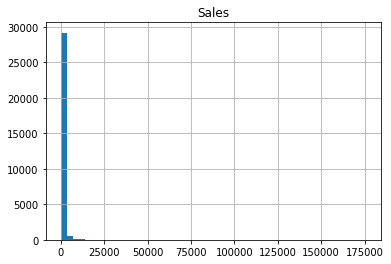

In [21]:
df.hist(column='Sales', bins=50)

### Feature set


#encoding https://datascience.stackexchange.com/questions/14069/mass-convert-categorical-columns-in-pandas-not-one-hot-encoding

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])
    
df.head()

In [22]:
#Remove empty or NaN raws

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)
df = df.reset_index()
del df['index']
df = df.reindex()
df.tail()

,Channel detailed,Direct Customer,Year,Quarter,Distributor,Qty,Qty Rank,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
29773,B2B,0,2019,4,Ingram Mexico,5,1,461.85,101W224SENW,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Space bundles - Apple devices,Display Solutions,Bundles,Apple
29774,B2B,0,2019,4,Ingram Mexico,7,1,332.99,HOVERTAB,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Hovertab,Display Solutions,Hovertab,Universal
29775,B2B,1,2020,1,TEKSERVE MEXICO SA DE CV,13,2,6096.56,WALLIPAD8B,Tekserve Mexico Sa De Cv,Mexico,LatAm,Efren,Storage & Charging Solutions,IT Hardware Security,Charging,Universal
29776,B2B,0,2019,3,Azlan,4,1,159.84,HOVERTAB,Tektraders Limited,UK,UK & Ireland,Niklas,Hovertab,Display Solutions,Hovertab,Universal
29777,07 Online Team,1,2020,1,tekxperience,7,1,505.45,IPADAIRBB,Tekxperience,US,USA,Don,iPad cases & Band,Display Solutions,IPADAIRBB,Apple


In [23]:
to_be_dummied = ['Channel detailed ', 'Distributor','SKU', 'Resellers','Country', 'Region', 'Rep. Region', 'Family - Priority', 'Family A', 'Family B', 'Family C']

In [24]:
obj_df = df.select_dtypes(include=['object']).copy()

In [43]:
from sklearn.preprocessing import LabelBinarizer

for i in to_be_dummied:
    lb_style = LabelBinarizer()
    lb_results = lb_style.fit_transform(obj_df[i])
    df= pd.concat([df, pd.DataFrame(lb_results, columns=lb_style.classes_)], axis=1)
    
df.tail()

,Channel detailed,Direct Customer,Year,Quarter,Distributor,Qty,Qty Rank,Sales,SKU,Resellers,...,Universal,Apple,Dell,Dragon,Microsoft,Others,Samsung,Universal,Verifone,Zebra
29773,B2B,0,2019,4,Ingram Mexico,5,1,461.85,101W224SENW,Tekserve Mexico S De Rl De Cv,...,0,1,0,0,0,0,0,0,0,0
29774,B2B,0,2019,4,Ingram Mexico,7,1,332.99,HOVERTAB,Tekserve Mexico S De Rl De Cv,...,0,0,0,0,0,0,0,1,0,0
29775,B2B,1,2020,1,TEKSERVE MEXICO SA DE CV,13,2,6096.56,WALLIPAD8B,Tekserve Mexico Sa De Cv,...,0,0,0,0,0,0,0,1,0,0
29776,B2B,0,2019,3,Azlan,4,1,159.84,HOVERTAB,Tektraders Limited,...,0,0,0,0,0,0,0,1,0,0
29777,07 Online Team,1,2020,1,tekxperience,7,1,505.45,IPADAIRBB,Tekxperience,...,0,1,0,0,0,0,0,0,0,0


In [126]:
df.columns[:20]

Index(['Channel detailed ', 'Direct Customer', 'Year', 'Quarter',
       'Distributor', 'Qty', 'Qty Rank', 'Sales', 'SKU', 'Resellers',
       'Country', 'Region', 'Rep. Region', 'Family - Priority', 'Family A',
       'Family B', 'Family C', '07 Online Team', 'Amazon', 'B2B'],
      dtype='object')

In [130]:
i1 = list([1,2,3,5,6,7])
i2 = list(range(17,len(df.columns)))
i3 = i1 +i2
df.columns[i3]

Index(['Direct Customer', 'Year', 'Quarter', 'Qty', 'Qty Rank', 'Sales',
       '07 Online Team', 'Amazon', 'B2B', 'Magento',
       ...
       'Universal', 'Apple', 'Dell', 'Dragon', 'Microsoft', 'Others',
       'Samsung', 'Universal', 'Verifone', 'Zebra'],
      dtype='object', length=10391)

In [116]:
X = df[['Channel detailed ', 'Direct Customer', 'Year', 'Quarter',
       'Distributor', 'Qty', 'Qty Rank', 'Sales', 'Resellers',
       'Country', 'Region', 'Rep. Region', 'Family - Priority', 'Family A',
       'Family B', 'Family C']].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


X[0:5]

ValueError: could not convert string to float: 'B2B'

In [ ]:
y = df['SKU'].values
y[0:5]

### Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Find best K

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# K Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model
k = 8
model_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat_KNN = model_KNN.predict(X_test)


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model_DT.fit(X_train, y_train)

yhat_DT = model_DT.predict(X_test)

# Support Vector Machine


In [ ]:
#Modeling (SVM with Scikit-learn)

from sklearn import svm

model_SVM = svm.SVC(kernel='rbf')

model_SVM.fit(X_train, y_train) 

yhat_SVM = model_SVM.predict(X_test)

# Logistic Regression


# Modeling (Logistic Regression with Scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


model_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat_LR = model_LR.predict(X_test)
yhat_proba = model_LR.predict_proba(X_test)

# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### ACCURACY SCORES 

In [ ]:
#K Nearest Neighbor(KNN)
knn_jaccard = jaccard_similarity_score(y_test, yhat_KNN)
knn_f1_score = f1_score(y_test, yhat_KNN, average='weighted')

In [ ]:
# Decission tree 
tree_jaccard = jaccard_similarity_score(y_test, yhat_DT)
tree_f1_score = f1_score(y_test, yhat_DT, average='weighted')

In [ ]:
# SVM 
svm_jaccard = jaccard_similarity_score(y_test, yhat_SVM)
svm_f1_score = f1_score(y_test, yhat_SVM, average='weighted')

# Logistic regression 
lr_jaccard = jaccard_similarity_score(y_test, yhat_LR)
lr_f1_score = f1_score(y_test, yhat_LR, average='weighted')
lr_log_loss = log_loss(y_test, yhat_proba)

In [ ]:
report = pd.DataFrame(data=np.array([["KNN", knn_jaccard, knn_f1_score, np.nan],
                                     ["Decision Tree", tree_jaccard, tree_f1_score, np.nan]
                                    ,["SVM", svm_jaccard, svm_f1_score, np.nan] 
                                    #,["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]
                                    ]), 
                      columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])


In [ ]:
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

report

In [ ]:
for i in yhat[0:10]:
    print(label_mapping['SKU'][i])